In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(-90.000, 90.000, size=1500)
lngs = np.random.uniform(-180.000, 180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)
    

619

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mendahara
City not found. Skipping...
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | georgetown
Processing Record 4 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 5 of Set 1 | nanortalik
Processing Record 6 of Set 1 | trelew
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | thinadhoo
Processing Record 9 of Set 1 | shar
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | castro
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | lipari
Processing Record 14 of Set 1 | saint-philippe
Processing Record 15 of Set 1 | barrow
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | ancud
Processing Record 19 of Set 1 | artsvanist
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | lagoa
Processing Record 22 of Set 1 | il

Processing Record 37 of Set 4 | pierre
Processing Record 38 of Set 4 | jatara
Processing Record 39 of Set 4 | dingle
Processing Record 40 of Set 4 | phultala
Processing Record 41 of Set 4 | kenai
Processing Record 42 of Set 4 | praia da vitoria
Processing Record 43 of Set 4 | quchan
Processing Record 44 of Set 4 | shenjiamen
Processing Record 45 of Set 4 | paamiut
Processing Record 46 of Set 4 | vila velha
Processing Record 47 of Set 4 | dikson
Processing Record 48 of Set 4 | kyren
Processing Record 49 of Set 4 | port moresby
Processing Record 50 of Set 4 | guerrero negro
Processing Record 1 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 2 of Set 5 | turkistan
Processing Record 3 of Set 5 | hasaki
Processing Record 4 of Set 5 | norman wells
Processing Record 5 of Set 5 | broken hill
Processing Record 6 of Set 5 | goundi
Processing Record 7 of Set 5 | broome
Processing Record 8 of Set 5 | liverpool
Processing Record 9 of Set 5 | yumbe
Processing Record 10 of Set 

City not found. Skipping...
Processing Record 30 of Set 8 | zhuji
Processing Record 31 of Set 8 | ixtapa
Processing Record 32 of Set 8 | tobolsk
Processing Record 33 of Set 8 | lexington
Processing Record 34 of Set 8 | nemuro
Processing Record 35 of Set 8 | sisimiut
Processing Record 36 of Set 8 | merauke
Processing Record 37 of Set 8 | timaru
Processing Record 38 of Set 8 | kimbe
Processing Record 39 of Set 8 | amahai
Processing Record 40 of Set 8 | burnie
Processing Record 41 of Set 8 | do rud
City not found. Skipping...
Processing Record 42 of Set 8 | rockingham
Processing Record 43 of Set 8 | mattru
Processing Record 44 of Set 8 | lapeer
Processing Record 45 of Set 8 | kuche
City not found. Skipping...
Processing Record 46 of Set 8 | bayan
Processing Record 47 of Set 8 | serenje
Processing Record 48 of Set 8 | hihifo
City not found. Skipping...
Processing Record 49 of Set 8 | udachnyy
Processing Record 50 of Set 8 | korsakovo
Processing Record 1 of Set 9 | leningradskiy
Processing 

Processing Record 17 of Set 12 | gudibanda
Processing Record 18 of Set 12 | mundwa
Processing Record 19 of Set 12 | camacupa
Processing Record 20 of Set 12 | ust-ilimsk
Processing Record 21 of Set 12 | skjaerhollen
City not found. Skipping...
Processing Record 22 of Set 12 | fortuna
Processing Record 23 of Set 12 | stykkisholmur
Processing Record 24 of Set 12 | huarmey
Processing Record 25 of Set 12 | stoyba
City not found. Skipping...
Processing Record 26 of Set 12 | haines junction
Processing Record 27 of Set 12 | saint-augustin
Processing Record 28 of Set 12 | waipawa
Processing Record 29 of Set 12 | santa vitoria do palmar
Processing Record 30 of Set 12 | camopi
Processing Record 31 of Set 12 | los llanos de aridane
Processing Record 32 of Set 12 | lukulu
Processing Record 33 of Set 12 | meulaboh
Processing Record 34 of Set 12 | cabatuan
Processing Record 35 of Set 12 | pervomayskiy
Processing Record 36 of Set 12 | kushima
Processing Record 37 of Set 12 | misratah
Processing Record

In [8]:
len(city_data)

560

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,38.48,99,100,2.73,NZ,2022-07-14 22:02:19
1,Georgetown,5.4112,100.3354,79.90,89,20,0.00,MY,2022-07-14 22:00:29
2,Nanortalik,60.1432,-45.2371,46.29,78,100,1.95,GL,2022-07-14 22:02:19
3,Trelew,-43.2490,-65.3051,43.92,70,100,14.16,AR,2022-07-14 22:02:20
4,Ahipara,-35.1667,173.1667,56.59,79,100,7.74,NZ,2022-07-14 22:02:20
5,Thinadhoo,0.5333,72.9333,82.72,76,67,11.07,MV,2022-07-14 22:02:20
6,Shar,49.5886,81.0453,60.93,50,4,5.91,KZ,2022-07-14 22:02:21
7,Busselton,-33.6500,115.3333,58.53,75,64,13.53,AU,2022-07-14 22:02:21
8,Castro,-24.7911,-50.0119,59.85,75,46,2.95,BR,2022-07-14 22:01:11
9,Albany,42.6001,-73.9662,81.01,54,77,1.01,US,2022-07-14 22:01:41


In [10]:
new_col_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_col_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2022-07-14 22:02:19,-46.1927,168.8643,38.48,99,100,2.73
1,Georgetown,MY,2022-07-14 22:00:29,5.4112,100.3354,79.90,89,20,0.00
2,Nanortalik,GL,2022-07-14 22:02:19,60.1432,-45.2371,46.29,78,100,1.95
3,Trelew,AR,2022-07-14 22:02:20,-43.2490,-65.3051,43.92,70,100,14.16
4,Ahipara,NZ,2022-07-14 22:02:20,-35.1667,173.1667,56.59,79,100,7.74
5,Thinadhoo,MV,2022-07-14 22:02:20,0.5333,72.9333,82.72,76,67,11.07
6,Shar,KZ,2022-07-14 22:02:21,49.5886,81.0453,60.93,50,4,5.91
7,Busselton,AU,2022-07-14 22:02:21,-33.6500,115.3333,58.53,75,64,13.53
8,Castro,BR,2022-07-14 22:01:11,-24.7911,-50.0119,59.85,75,46,2.95
9,Albany,US,2022-07-14 22:01:41,42.6001,-73.9662,81.01,54,77,1.01


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

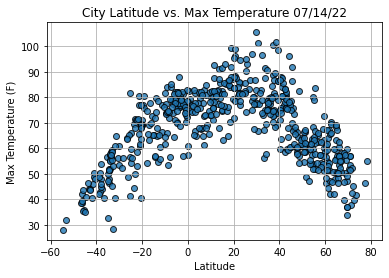

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

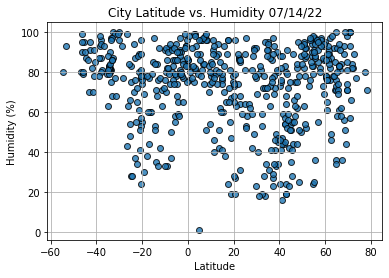

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

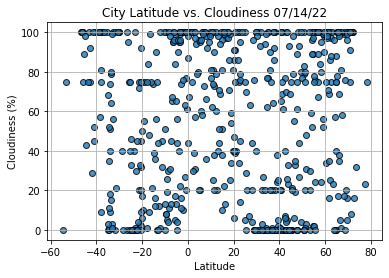

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

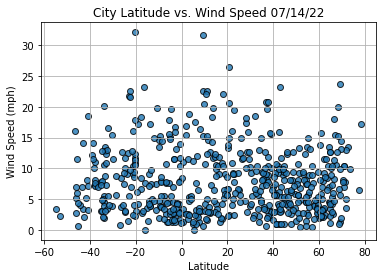

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [17]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
index13 = city_data_df.loc[13]

In [19]:
index13

City                 Puerto Ayora
Country                        EC
Date          2022-07-14 22:02:23
Lat                       -0.7393
Lng                      -90.3518
Max Temp                    70.56
Humidity                       93
Cloudiness                     77
Wind Speed                   8.01
Name: 13, dtype: object

In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

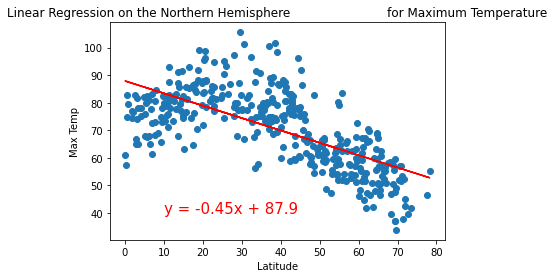

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

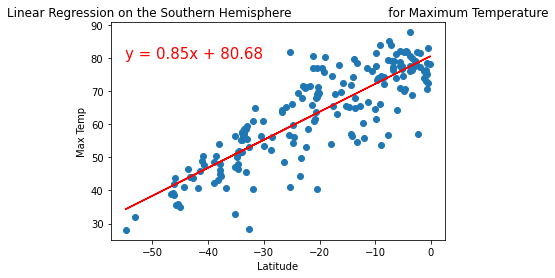

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-55,80))

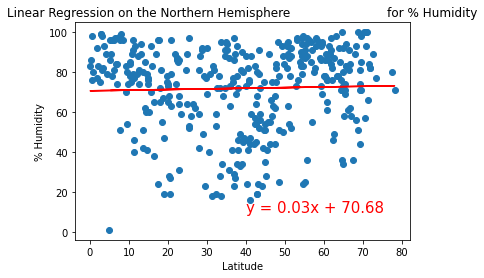

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

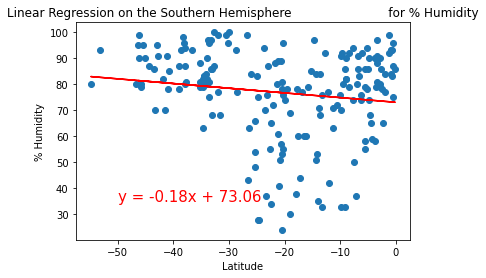

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,35))

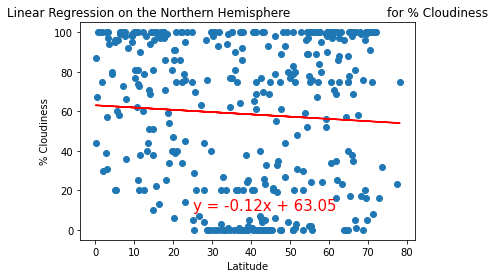

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(25,10))

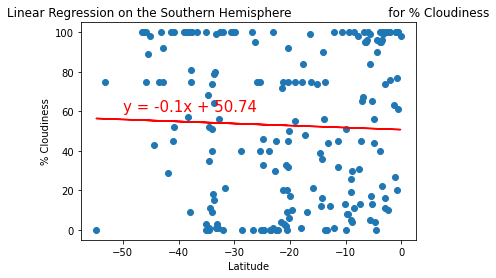

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

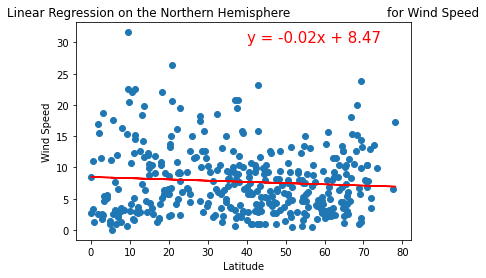

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,30))

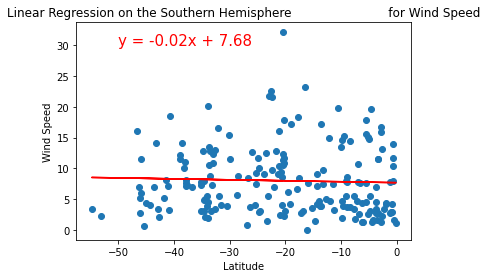

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,30))